SAIF MOKARROM


Access the dataset from drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive/',force_remount=True)

Mounted at /content/drive/


In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt

import train(0.7), validation(.1), test(.2)

Set Image height and width to 64x64 unit

In [ ]:
img_height, img_width = 64, 64 
batch_size = 20

train_ds = tf.keras.utils.image_dataset_from_directory(
    "/content/drive/MyDrive/Datasets/weather/train",
    image_size = (img_height, img_width),
    batch_size = batch_size
)
val_ds = tf.keras.utils.image_dataset_from_directory(
    "/content/drive/MyDrive/Datasets/weather/validation",
    image_size = (img_height, img_width),
    batch_size = batch_size
)
test_ds = tf.keras.utils.image_dataset_from_directory(
    "/content/drive/MyDrive/Datasets/weather/test",
    image_size = (img_height, img_width),
    batch_size = batch_size
)

Found 849 files belonging to 4 classes.
Found 111 files belonging to 4 classes.
Found 224 files belonging to 4 classes.


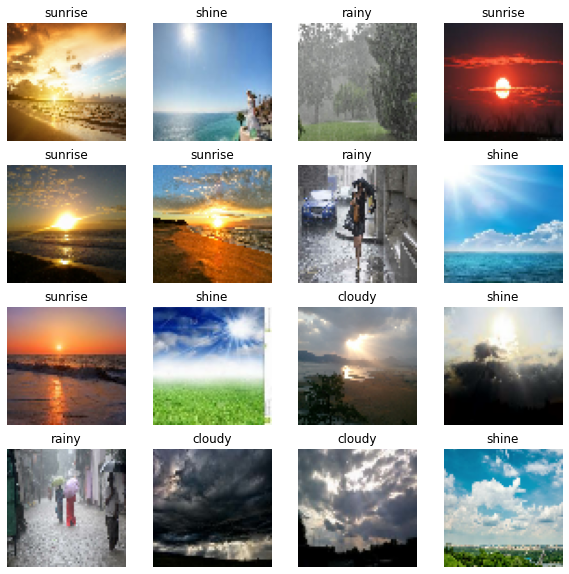

In [ ]:
class_names = ["cloudy", "rainy", "shine", "sunrise"]
plt.figure(figsize=(10,10))
for images, labels in train_ds.take(1):
  for i in range(16):
    ax = plt.subplot(4, 4, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

Building model




In [ ]:
model = tf.keras.Sequential(
    [
     tf.keras.layers.Rescaling(1./255), #rescalling rgb value between 0 to 1
     tf.keras.layers.Conv2D(32, (3,3), activation="relu"),
     tf.keras.layers.MaxPooling2D(),
     tf.keras.layers.Conv2D(32, (3,3), activation="relu"), #applying Conv2d: filetrs=32, karnel size=(3x3)
     tf.keras.layers.MaxPooling2D(),
     tf.keras.layers.Conv2D(64, (3,3), activation="relu"), 
     tf.keras.layers.MaxPooling2D(),
     tf.keras.layers.Flatten(),
     tf.keras.layers.Dense(128, activation="relu"), #input dense
     tf.keras.layers.Dense(4, activation ="softmax") 
     #output dense: 4 beacuse we have 4 classes in image data
    ]
)


In [ ]:
model.compile(
    optimizer="adam",
    loss=tf.losses.SparseCategoricalCrossentropy(from_logits = True),
    metrics=['accuracy']
)

Fitting model

In [ ]:
from keras import callbacks

earlystopping = callbacks.EarlyStopping(monitor ="val_loss", 
                                        mode ="min", patience = 5, 
                                        restore_best_weights = True)
model.fit(
    train_ds,
    validation_data = val_ds,
    epochs = 20,
    callbacks =[earlystopping]
    #earlystopping callback to stop epochs before getting a low val loss value between train and validation data
)

Epoch 1/20
43/43 [==============================] - 4s 63ms/step - loss: 0.8238 - accuracy: 0.6196 - val_loss: 0.8597 - val_accuracy: 0.6577
Epoch 2/20
43/43 [==============================] - 3s 59ms/step - loss: 0.5797 - accuracy: 0.7585 - val_loss: 0.8228 - val_accuracy: 0.7477
Epoch 3/20
43/43 [==============================] - 3s 60ms/step - loss: 0.4642 - accuracy: 0.8280 - val_loss: 0.6229 - val_accuracy: 0.8198
Epoch 4/20
43/43 [==============================] - 3s 59ms/step - loss: 0.3999 - accuracy: 0.8445 - val_loss: 0.7148 - val_accuracy: 0.8108
Epoch 5/20
43/43 [==============================] - 3s 61ms/step - loss: 0.3852 - accuracy: 0.8657 - val_loss: 0.6623 - val_accuracy: 0.8559
Epoch 6/20
43/43 [==============================] - 3s 61ms/step - loss: 0.3167 - accuracy: 0.8799 - val_loss: 0.5847 - val_accuracy: 0.8559
Epoch 7/20
43/43 [==============================] - 3s 61ms/step - loss: 0.2492 - accuracy: 0.9046 - val_loss: 0.5759 - val_accuracy: 0.8919
Epoch 8/20
43

In [ ]:
model.evaluate(test_ds)

12/12 [==============================] - 1s 21ms/step - loss: 0.2525 - accuracy: 0.9152


[0.25247809290885925, 0.9151785969734192]

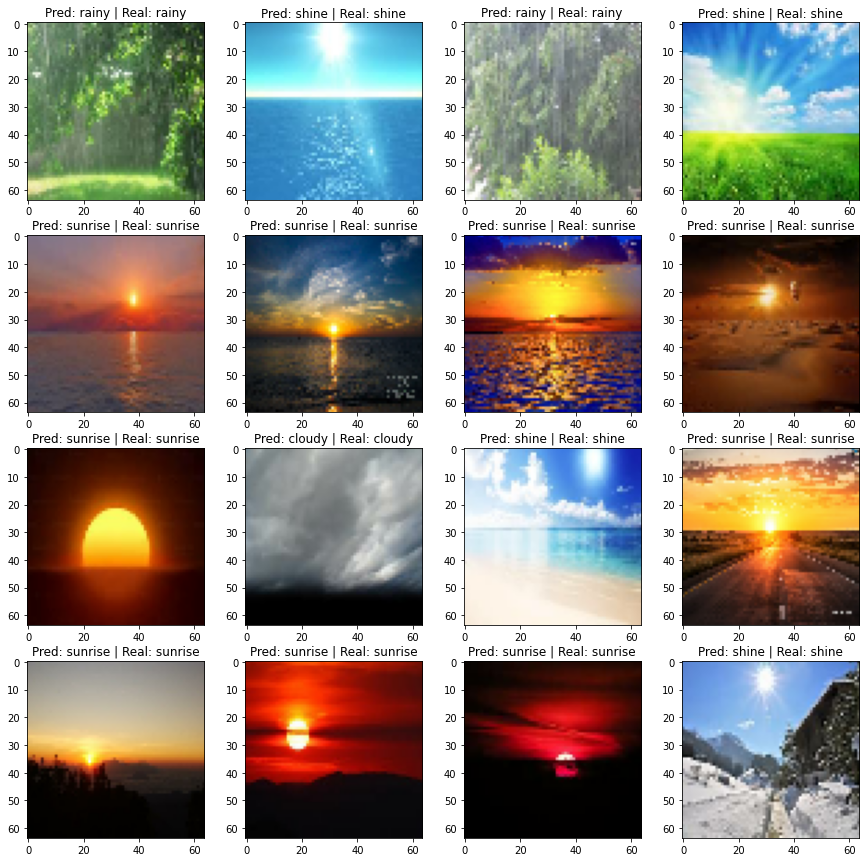

In [ ]:
import numpy

plt.figure(figsize=(15,15))
for images, labels in test_ds.take(1):
  classifications = model(images)

  
  for i in range(16):
    ax = plt.subplot(4, 4, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    index = numpy.argmax(classifications[i])
    plt.title("Pred: " + class_names[index] + " | Real: " + class_names[labels[i]])

This part converts a downloadable part then we can use it in android studio to build a mobile app 

In [ ]:
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()

with open("model.tflite", 'wb') as f:
  f.write(tflite_model)